# Problem Statement
Take the Restaurant dataset from kaggle

1. Calculate sentiment score for each row, 
2. Get how many rows has negative/positive/neutral comments.
3. Plot how many rows has negative/positive/neutral comments.

------------

# Note
The file is stored as a ```tsv```.

Load a ```tsv``` file with ```pd.read_csv``` while passing the seperator or ```sep``` argument as ```\t```.

This tells pandas that the file is seperated by tab's instead of comma's

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [5]:
positive_words=set(opinion_lexicon.positive())
negative_words=set(opinion_lexicon.negative())

In [6]:
"boom" in positive_words

True

In [ ]:
# QUESTION - 1

In [7]:
def function(x):
    x=x.lower()
    y=word_tokenize(x)
    temp=[]
    for i in y:
        if i in positive_words:
            temp.append(1)
        elif i in negative_words:
            temp.append(-1)
        else:
            temp.append(0)
    return(sum(temp)/len(temp))

In [9]:
function("Rahul is fine but not very happy")

0.2857142857142857

In [10]:
df["Review"].apply(function)

0      0.333333
1      0.200000
2     -0.111111
3      0.125000
4      0.076923
         ...   
995   -0.076923
996    0.250000
997    0.090909
998    0.000000
999   -0.031250
Name: Review, Length: 1000, dtype: float64

In [11]:
df["Score"]=df["Review"].apply(function)

In [12]:
df

,Review,Liked,Score
0,Wow... Loved this place.,1,0.333333
1,Crust is not good.,0,0.200000
2,Not tasty and the texture was just nasty.,0,-0.111111
3,Stopped by during the late May bank holiday of...,1,0.125000
4,The selection on the menu was great and so wer...,1,0.076923
...,...,...,...
995,I think food should have flavor and texture an...,0,-0.076923
996,Appetite instantly gone.,0,0.250000
997,Overall I was not impressed and would not go b...,0,0.090909
998,"The whole experience was underwhelming, and I ...",0,0.000000


In [ ]:
# QUESTION - 2

In [15]:
def sentiment_score(x):
    temp = 0
    if x > 0:
        temp = 1
    elif x < 0:
        temp = -1
    else:
        temp = 0
    return temp

In [16]:
df["Score"].apply(sentiment_score)

0      1
1      1
2     -1
3      1
4      1
      ..
995   -1
996    1
997    1
998    0
999   -1
Name: Score, Length: 1000, dtype: int64

In [18]:
df["Sentiment Classifier"] = df["Score"].apply(sentiment_score)

In [19]:
df

,Review,Liked,Score,Sentiment Classifier
0,Wow... Loved this place.,1,0.333333,1
1,Crust is not good.,0,0.200000,1
2,Not tasty and the texture was just nasty.,0,-0.111111,-1
3,Stopped by during the late May bank holiday of...,1,0.125000,1
4,The selection on the menu was great and so wer...,1,0.076923,1
...,...,...,...,...
995,I think food should have flavor and texture an...,0,-0.076923,-1
996,Appetite instantly gone.,0,0.250000,1
997,Overall I was not impressed and would not go b...,0,0.090909,1
998,"The whole experience was underwhelming, and I ...",0,0.000000,0


In [ ]:
# QUESTION - 3

<AxesSubplot:ylabel='Sentiment Classifier'>

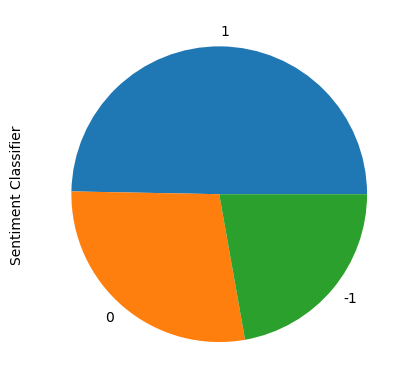

In [20]:
df["Sentiment Classifier"].value_counts().plot(kind="pie")